# Digits classification using CNN

In [2]:
# importing the necessary libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the train data
train = pd.read_csv("train (2).csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.shape

(28000, 784)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [9]:
# put the labels columns as y_train

y_train = train['label']
X_train = train.drop(labels = ['label'], axis = 1)

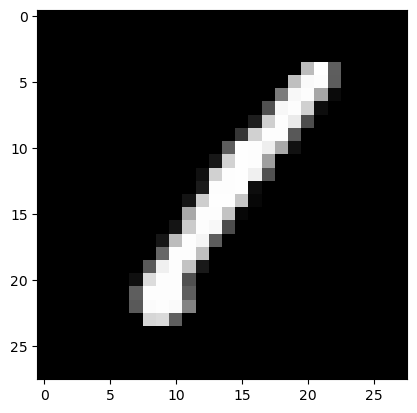

In [10]:
img=X_train.iloc[0].values
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')

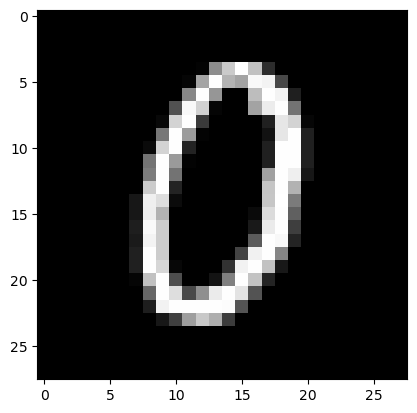

In [11]:
img1=X_train.iloc[5].values
img1=img1.reshape((28,28))
plt.imshow(img1,cmap='gray')

In [13]:
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [14]:
# check for missing values in any rows

missing_values = test.isnull().any(axis=1)
count_missing_values = missing_values.sum()
count_missing_values

0

In [15]:
# Normalize the image data
X_train = X_train/255.0
test = test/255.0

In [16]:
X_train.shape, test.shape

((42000, 784), (28000, 784))

In [17]:
# we need to reshape the images and perform a grayscale to reduce the efefct of illumination and perform normalization for all data

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [18]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train,num_classes = num_classes)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

In [19]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

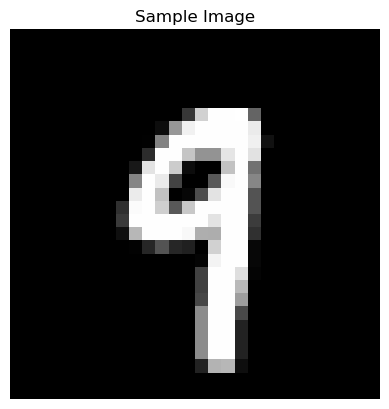

In [20]:
plt.imshow(X_train[2][:,:,0], cmap = 'gray')
plt.title('Sample Image')
plt.axis('off')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPool2D 
from keras.optimizers import Adam # Adaptive Moment Estimation


In [69]:
# Build the CNN model

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size=(5,5), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size=(3,3),  activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [23]:
# Define the optimizer
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7604 - loss: 0.7171
Epoch 2/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9440 - loss: 0.1673
Epoch 3/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9590 - loss: 0.1299
Epoch 4/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9668 - loss: 0.1055
Epoch 5/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9719 - loss: 0.0902
Epoch 6/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9735 - loss: 0.0860
Epoch 7/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9731 - loss: 0.0800
Epoch 8/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9769 - loss: 0.0704
Epoch 9/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9786 - loss: 0.0706
Epoch 10/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9799 - loss: 0.0638
Epoch 11/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9798 - loss: 0.0654
Epoch 12/20
1182/1182 ━━━━━

In [26]:
model.evaluate(X_val,y_val)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0292


[0.029197482392191887, 0.9902380704879761]

In [28]:
# Testing data
predict = model.predict(test)
print(predict)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[5.7649885e-10 6.6825817e-10 1.0000000e+00 ... 1.4796632e-09
  1.3139008e-08 2.5111882e-10]
 [9.9992752e-01 4.1582439e-11 1.9076177e-07 ... 1.6383087e-06
  1.6103128e-07 2.6257701e-05]
 [3.2687679e-09 9.3097633e-08 2.6655907e-06 ... 1.3313465e-06
  1.9419042e-03 9.9630284e-01]
 ...
 [1.0503148e-18 3.7574254e-12 1.9231468e-12 ... 1.1227056e-12
  2.1901386e-10 3.9967484e-11]
 [7.9487222e-11 1.5128575e-09 1.3136515e-09 ... 1.9453463e-04
  9.4465591e-08 9.9966013e-01]
 [1.9964494e-11 1.9111693e-10 1.0000000e+00 ... 2.5084708e-09
  2.3948790e-08 7.2636208e-10]]


In [30]:
predicted_labels = np.argmax(model.predict(test), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [32]:
predicted_labels

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

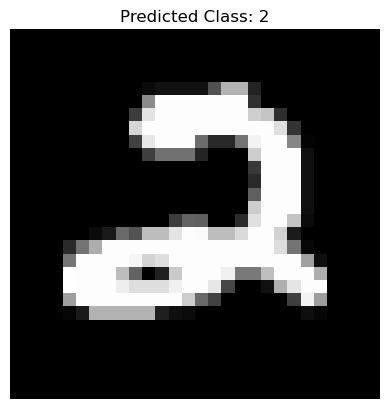

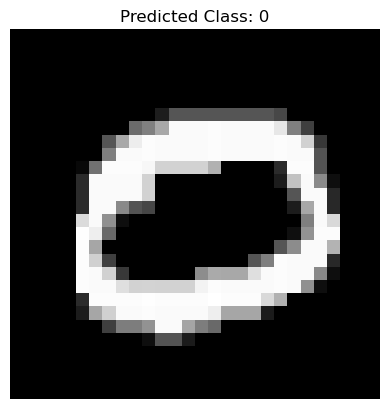

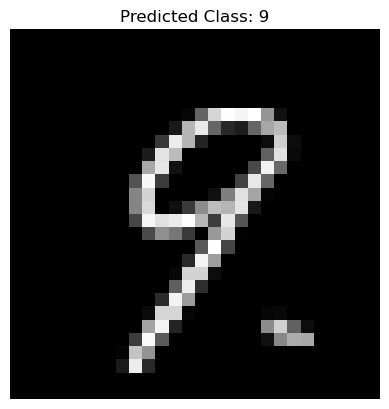

In [34]:
# Display the first 5 test images with their predicted labels
for i in range(3):
    plt.imshow(test[i], cmap='gray')
    plt.title(f"Predicted Class: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

In [36]:
# Evaluation Metrics

predict_labels = np.argmax(predict, axis = 1)
predict_labels

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [38]:
val_predict = model.predict(X_val)
val_predict_labels = np.argmax(val_predict, axis = 1)
y_val_labels = np.argmax(y_val, axis = 1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [40]:
cm = confusion_matrix(y_val_labels, val_predict_labels)
print(cm)

[[410   0   0   0   0   0   1   0   0   0]
 [  0 482   1   0   0   0   0   0   2   0]
 [  1   0 401   0   0   0   0   0   0   1]
 [  0   0   0 413   0   2   0   0   3   0]
 [  0   1   0   0 451   0   1   0   1   7]
 [  0   0   0   1   0 369   1   0   1   0]
 [  3   1   0   0   2   0 405   0   2   0]
 [  0   0   1   0   0   0   0 445   0   0]
 [  0   1   0   0   0   0   0   0 380   1]
 [  1   0   0   1   1   0   0   2   1 403]]


In [42]:
classreport = classification_report(y_val_labels, val_predict_labels)
print(classreport)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       0.99      0.99      0.99       485
           2       1.00      1.00      1.00       403
           3       1.00      0.99      0.99       418
           4       0.99      0.98      0.99       461
           5       0.99      0.99      0.99       372
           6       0.99      0.98      0.99       413
           7       1.00      1.00      1.00       446
           8       0.97      0.99      0.98       382
           9       0.98      0.99      0.98       409

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

